In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('post_cleaning.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,id,name,survey_year,is_accredited,has_score,accreditation_body,max_score,score,normalised_score
0,0,0,20744,656,2015,1,1,358,4.0,2.660000,0.665039
1,1,1,29455,1046,2015,1,0,159,1.0,0.680176,0.680176
2,2,2,33323,1494,2015,1,0,159,1.0,0.680176,0.680176
3,3,3,18907,3662,2015,1,1,358,4.0,2.020000,0.504883
4,4,4,32917,2406,2015,1,0,361,1.0,0.680176,0.680176


In [2]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,id,name,survey_year,is_accredited,has_score,accreditation_body,max_score,score,normalised_score
count,6584.000000,6584.000000,6584.000000,6584.000000,6584.0,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000
mean,3291.500000,14025.587029,24691.044654,3071.190462,2015.0,0.999848,0.869077,343.054982,23.890644,16.619780,0.676940
std,1900.781418,9967.623732,14045.601904,1772.439931,0.0,0.012324,0.337342,80.489128,134.533693,94.482406,0.135451
min,0.000000,0.000000,15.000000,0.000000,2015.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1645.750000,1645.750000,11960.750000,1521.750000,2015.0,1.000000,1.000000,358.000000,4.000000,2.100000,0.600098
50%,3291.500000,10525.500000,22932.000000,3081.500000,2015.0,1.000000,1.000000,358.000000,4.000000,2.610000,0.680176
75%,4937.250000,19376.250000,36364.000000,4618.250000,2015.0,1.000000,1.000000,358.000000,4.000000,3.040000,0.752441
max,6583.000000,28303.000000,55559.000000,6127.000000,2015.0,1.000000,1.000000,619.000000,999.000000,970.000000,1.000000


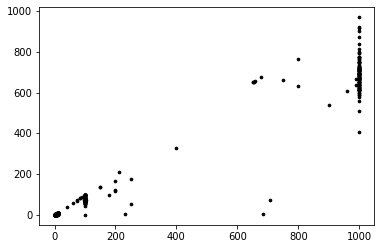

In [3]:
# Getting the values and plotting it
f1=data['max_score'].values
f2=data['score'].values
X=np.array(list(zip(f1,f2)))
plt.scatter(f1,f2,c='black',s=7)

In [4]:
# Euclidean Distance Caculator
def dist(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [5]:
# Number of clusters
k=3
# X coordinates of random centroids
C_x=np.random.randint(0,np.max(X)-20,size=k)
# Y coordinates of random centroids
C_y=np.random.randint(0,np.max(X)-20,size=k)
C=np.array(list(zip(C_x, C_y)),dtype=np.float32)
print(C)

[[434. 594.]
 [182. 225.]
 [729. 889.]]


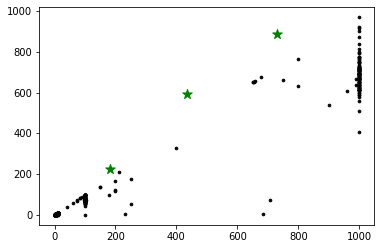

In [6]:
# Plotting along with the Centroids
plt.scatter(f1,f2,c='#050505',s=7)
plt.scatter(C_x,C_y,marker='*',s=100,c='g')

In [7]:
# To store the value of centroids when it updates
C_old=np.zeros(C.shape)
# Cluster Lables(0,1,2)
clusters=np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error=dist(C,C_old,None)
# Loop will run till the error becomes zero
while error!=0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances=dist(X[i],C)
        cluster=np.argmin(distances)
        clusters[i]=cluster
    # Storing the old centroid values
    C_old=deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points=[X[j] for j in range(len(X)) if clusters[j]==i]
        C[i]=np.mean(points,axis=0)
    error=dist(C,C_old,None)

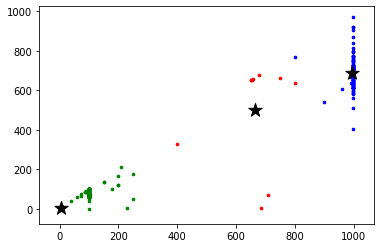

In [8]:
colors=['r','g','b','y','c','m']
fig,ax=plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j]==i])
        ax.scatter(points[:,0],points[:,1], s=7,c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*',s=200,c='#050505')

In [1]:
# From this visualization it is clear that there are 3 clusters with black stars as their centroid